#1 - Instalações

In [1]:
#Instalando a biblioteca networkx e wikipedia
!pip install networkx==2.6.2
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=90a46b72ff73dd0213836b0af703cc5ce469a053b4bfe31ac79d010cc2afd2b8
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
#Importação das bibliotecas
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

#2 - Geração da Rede

In [3]:
#Determinação do artigo a se basear
#Link: https://en.wikipedia.org/wiki/European_Volleyball_Confederation
SEED = "Voleibol".title()

In [4]:
#todo_lst e todo_set armazenam dados não processados
#todo_lst: dados ordenado que indica o dado a ser processado
#todo_set: dado não ordenado que indica dados já processados na geração da rede

todo_lst = [(0, SEED)] # A SEED na camada 0
todo_set = set(SEED) # A SEED por si só
done_set = set() #Como nada foi feito ainda, ficará vazio

In [5]:
#Criação do Grafo Direcional
g = nx.DiGraph()
layer, page = todo_lst[0]

In [6]:
#Preenchimento do grafo
%%time
while layer < 2:
  #Remove o nome da página da todo_list e adiciona no conjunto de paginas a serem processadas
  #Se a página for encontrada novamento, o processo passará a página novamente. 
  del todo_lst[0]
  done_set.add(page)
  #Impressão do progresso
  print(layer, page)
  #Tentativa de download da página selecionada
  try:
    wiki = wikipedia.page(page)
  except:
    layer, page = todo_lst[0]
    print("Não foi possível carregar a seguinte página:", page)
    continue
  #Para cada link presente na página
  #Iremos determinar o título da página e verificar se nele não está como lista
  #Caso não esteja verificaremos se os links encontrados não estão dentro do que vão ser / foram processados nessa camada
  #Caso não esteja será adicionado a camada posterior
  for link in wiki.links:
    link = link.title()
    if not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Voleibol
1 Afghanistan Volleyball Association
1 Africa Beach Volleyball Championship
1 Africa Women'S Beach Volleyball Championship
1 African Clubs Championship (Volleyball)
1 African Volleyball Championship U19
1 African Volleyball Championship U21
1 African Volleyball Confederation
1 African Volleyball Cup Winners' Cup
1 Albania
1 Albanian Federation Of Volleyball
1 Algerian Volleyball Federation
1 Amateur Volleyball Association Of Macao
1 American Samoa Volleyball Association
1 Andorra
1 Anguilla Volleyball Association
1 Antigua And Barbuda Volleyball Association
1 Argentine Volleyball Federation
1 Armenia
1 Aruba Volleyball Association
1 Asian Boys' U18 Volleyball Championship
1 Asian Girls' U17 Volleyball Championship
1 Asian Men'S Club Volleyball Championship
1 Asian Men'S U20 Volleyball Championship
1 Asian Men'S U23 Volleyball Championship
1 Asian Men'S Volleyball Challenge Cup
1 Asian Men'S Volleyball Championship
1 Asian Men'S Volleyball Cup
1 Asian Volleyball Confederation

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Não foi possível carregar a seguinte página: Bucharest
1 Bucharest
1 Buenos Aires
1 Bulgaria
1 Bulgarian Volleyball Federation
1 Cev Challenge Cup
1 Cev Champions League
1 Cev Cup
1 Cev Women'S Challenge Cup
1 Cev Women'S Champions League
1 Cambodia Volleyball Federation
1 Cayman Islands Volleyball Federation
1 Chinese Taipei Volleyball Association
1 Chinese Volleyball Association
1 Comité Européen De Rink-Hockey
1 Commonwealth Of Independent States
1 Confederación Sudamericana De Voleibol
1 Confederation Of European Baseball
1 Cook Islands Volleyball Association
1 Croatia
1 Croatian Volleyball Federation
1 Curaçaose Volleyball Bond
Não foi possível carregar a seguinte página: Cyprus
1 Cyprus
1 Cyprus Volleyball Federation
1 Czech Republic
1 Czech Volleyball Association
1 Dhl Express
Não foi possível carregar a seguinte página: Dansk Volleyball Forbund
1 Dansk Volleyball Forbund
Não foi possível carregar a seguinte página: Denizbank
1 Denizbank
1 Denmark
1 Dominica Volleyball Associati

In [7]:
print("{} nós, {} links".format(len(g), nx.number_of_edges(g)))

75667 nós, 196099 links


#3 - Limpeza dos dados

In [8]:
#Realizando uma cópia do grafo original
original = g.copy()

In [9]:
# Remoção de loops de um nó consigo mesmo
g.remove_edges_from(nx.selfloop_edges(g))

In [10]:
# Identificando duplicatas entre plural como: 'network' e 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]
for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)
print(duplicates)
duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)
for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

[('Sport', 'Sports'), ('Ancient Greek', 'Ancient Greeks'), ('Architectural Style', 'Architectural Styles'), ('Birth Rate', 'Birth Rates'), ('Catholic', 'Catholics'), ('Dairy Product', 'Dairy Products'), ('Gheg Albanian', 'Gheg Albanians'), ('Great Power', 'Great Powers'), ('Illyrian Tribe', 'Illyrian Tribes'), ('Indo-European Language', 'Indo-European Languages'), ('Island', 'Islands'), ('Language', 'Languages'), ('Movie Theater', 'Movie Theaters'), ('Neanderthal', 'Neanderthals'), ('Protestant', 'Protestants'), ('Romani Language', 'Romani Languages'), ('World Heritage Site', 'World Heritage Sites'), ('Cereal', 'Cereals'), ('Chinese Dragon', 'Chinese Dragons'), ('Cistercian', 'Cistercians'), ('Extermination Camp', 'Extermination Camps'), ('Fossil Fuel', 'Fossil Fuels'), ('Magnate', 'Magnates'), ('Nuclear Power Plant', 'Nuclear Power Plants'), ('Saint', 'Saints'), ('Soft Drink', 'Soft Drinks'), ('Temperate Broadleaf And Mixed Forest', 'Temperate Broadleaf And Mixed Forests'), ('Ultra', 

In [11]:
#nx.contracted cria um novo atributo nó/link chamado contração
#o valor do atributo é um dicionário, mas GraphML não suporta valores atributos de dicionário
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

In [12]:
print("{} nós, {} links".format(len(g), nx.number_of_edges(g)))

75369 nós, 195829 links


#4- Truncar a Rede

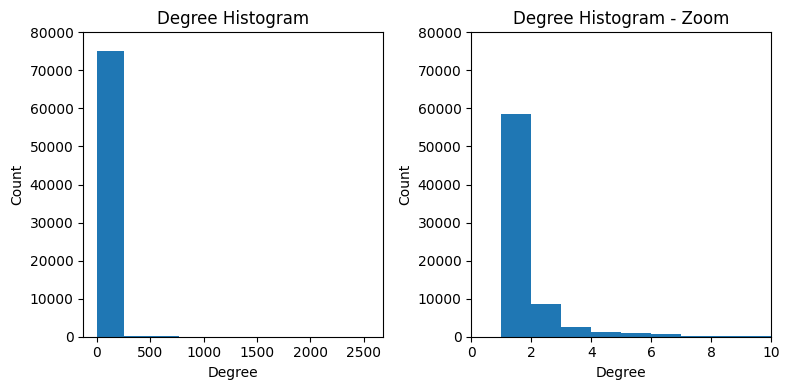

In [13]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,80000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,80000)

plt.tight_layout()
plt.show()

In [16]:
# filter nodes with degree greater than or equal to 5
core = [node for node, deg in dict(g.degree()).items() if deg >= 5]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "voleibol.graphml")

4536 nodes, 107567 edges


#5 - Determinação dos nós mais importantes

In [17]:
#Definição dos nós principais
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:10]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

315 Volleyball
272 Fédération Internationale De Volleyball
271 Asian Volleyball Confederation
267 European Volleyball Confederation
251 Fivb Volleyball Women'S World Championship
251 Fivb Volleyball Men'S World Championship
249 Volleyball At The Summer Olympics
247 Fivb Volleyball Men'S World Cup
246 Fivb Volleyball Women'S World Cup
245 Confederación Sudamericana De Voleibol
